In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path



In [68]:
os.chdir("/home/siti/Downloads/New NHS Data")


In [53]:
def extract_models_performances(algorithm_folder, model_names):
    nested_folder = "Version 2"
    dfs = []  # To store individual DataFrames

    for model_name in model_names:
        # Construct the path for the performance metrics CSV file
        csv_file_name = f"{model_name.replace(' ', '')}_Performance_metrics.csv"
        
        csv_path = os.path.join(
            "/home/siti/Downloads/New Modelling",  # Root folder
            algorithm_folder,  # Algorithm-specific folder
            nested_folder,  # Version-specific folder
            model_name,  # Model-specific folder
            csv_file_name  # File name
        )
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path)
        
        # Add a 'Model' column to keep track of the model
        df['Model'] = model_name
        df['Algorithm'] = algorithm_folder.split('_')[0]
        
        # Add the DataFrame to the list
        dfs.append(df)
        
    # Concatenate all DataFrames
    all_df = pd.concat(dfs, ignore_index=True)
    
    return all_df



In [54]:
def extract_error_rates(algorithm_folder, model_names):
    nested_folder = "Version 2"
    dfs = []  # To store individual DataFrames

    for model_name in model_names:
        # Construct the path for the performance metrics CSV file
        csv_file_name = "Model_Metrics.csv"
        
        csv_path = os.path.join(
            "/home/siti/Downloads/New Modelling",  # Root folder
            algorithm_folder,  # Algorithm-specific folder
            nested_folder,  # Version-specific folder
            model_name,  # Model-specific folder
            csv_file_name  # File name
        )
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path)
        
        # Add a 'Model' column to keep track of the model
        df['Model'] = model_name
        df['Algorithm'] = algorithm_folder.split('_')[0]
        
        # Add the DataFrame to the list
        dfs.append(df)
        
    # Concatenate all DataFrames
    all_df = pd.concat(dfs, ignore_index=True)
    
    return all_df


In [55]:
# Set model names
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]

# Call the function and pass the algorithm folder name
all_DT_df = extract_models_performances("DT_folder", model_names)

all_RF_df = extract_models_performances("RandomForest_folder", model_names)

all_XGBoost_df = extract_models_performances("XGBoost_folder", model_names)

all_LR_df = extract_models_performances("LogisticRegression_folder", model_names)

In [56]:

# Call the function and pass the algorithm folder name
error_DT_df = extract_error_rates("DT_folder", model_names)

error_RF_df = extract_error_rates("RandomForest_folder", model_names)

error_XGBoost_df = extract_error_rates("XGBoost_folder", model_names)

error_LR_df = extract_error_rates("LogisticRegression_folder", model_names)

In [70]:
results_folder = Path("Models Errors")
results_folder.mkdir(parents=True, exist_ok=True)

all_errors_df = pd.concat([error_DT_df, error_RF_df, error_XGBoost_df, error_LR_df], ignore_index=True)
all_errors_df['Metric'] = all_errors_df['Metric'].replace({'Test Error ': 'Test Error', 'Combined Error': 'Training Error'})

all_errors_df.to_csv(results_folder / "Models_errors.csv")

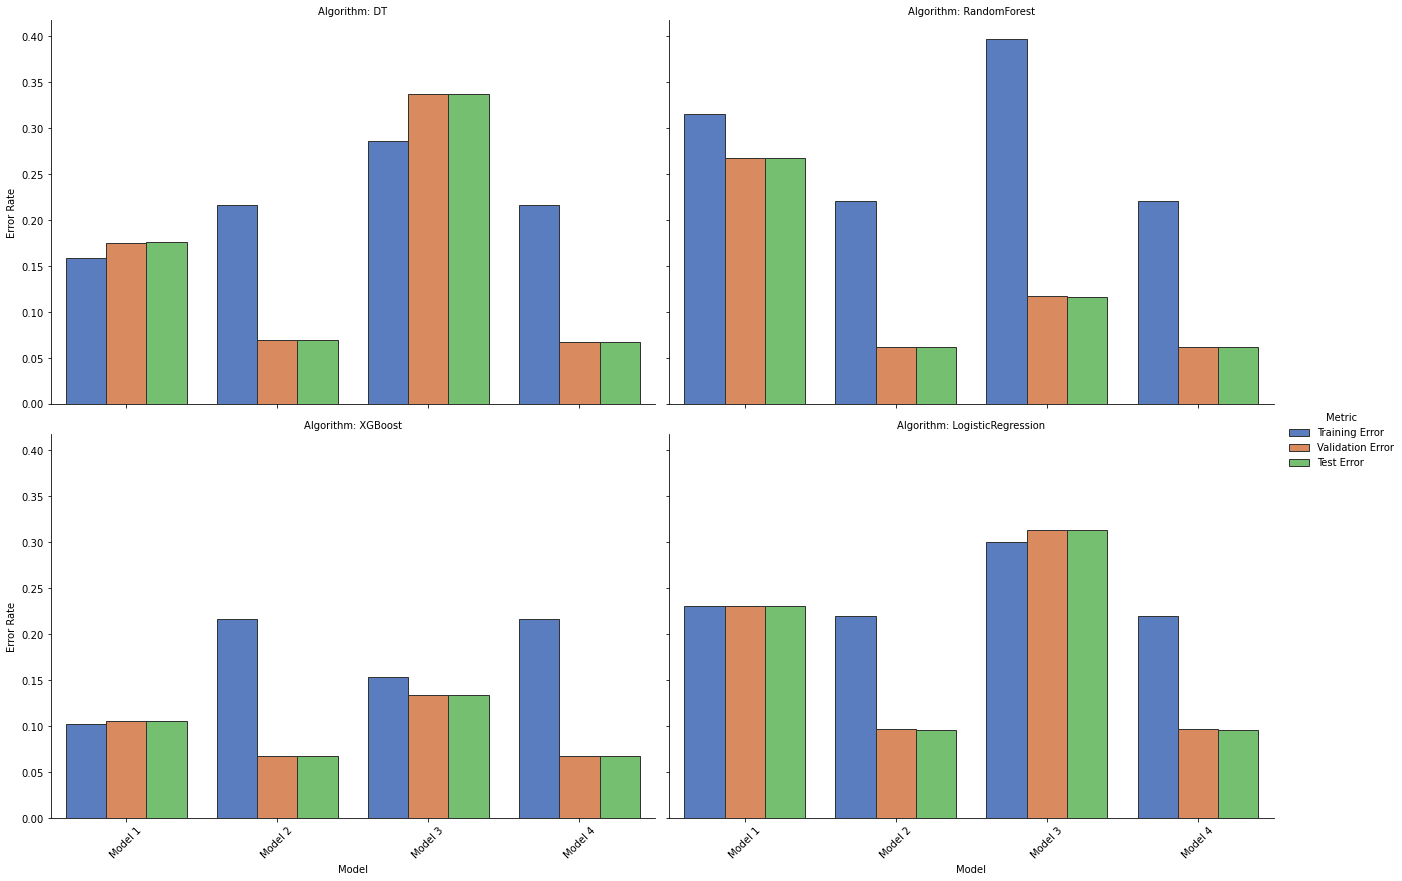

In [82]:
# Pivot the DataFrame to ease the plotting
all_errors_pivot_df = all_errors_df.pivot_table(values='Value', index=['Model', 'Algorithm'], columns='Metric')

# Unique models and metrics from your DataFrame
unique_models = all_errors_df['Model'].unique().tolist()
unique_metrics = all_errors_df['Metric'].unique().tolist()

# Initialize a 2x2 FacetGrid (adjust the size as needed)
g = sns.FacetGrid(all_errors_df, col="Algorithm", col_wrap=2, height=6, aspect=1.5)

# Map sns.barplot onto the grid with specified order and hue_order
g.map(sns.barplot, 'Model', 'Value', 'Metric', ci=None, palette='muted', edgecolor=".2",
      order=unique_models, hue_order=unique_metrics)

# Additional plot formatting
g.set_axis_labels("Model", "Error Rate")  # Set both x and y-axis labels
g.set_titles("Algorithm: {col_name}")     # Titles for each subplot based on the algorithm
g.set_xticklabels(rotation=45)            # Rotate x-axis labels for better visibility
g.add_legend(title="Metric")               # Add a legend
plt.savefig(results_folder / "Models_error_rates.png")
plt.show()


In [12]:
print(all_LR_df.head())
print(all_LR_df['Model'].unique())

all_LR_df

         Metric               Value    Model           Algorithm
0  ROC-AUC Test   0.730751804077831  Model 1  LogisticRegression
1      Accuracy  0.7700396104872682  Model 1  LogisticRegression
2     Precision  0.9586019460136828  Model 1  LogisticRegression
3        Recall  0.7891141690967307  Model 1  LogisticRegression
4      F1 Score  0.8656398731842181  Model 1  LogisticRegression
['Model 1' 'Model 2' 'Model 3' 'Model 4']


,Metric,Value,Model,Algorithm
0,ROC-AUC Test,0.730751804077831,Model 1,LogisticRegression
1,Accuracy,0.7700396104872682,Model 1,LogisticRegression
2,Precision,0.9586019460136828,Model 1,LogisticRegression
3,Recall,0.7891141690967307,Model 1,LogisticRegression
4,F1 Score,0.8656398731842181,Model 1,LogisticRegression
5,Confusion Matrix,[[ 55835 61050]\n [ 377791 1413657]],Model 1,LogisticRegression
6,ROC-AUC Test,0.7656903235114333,Model 2,LogisticRegression
7,Accuracy,0.9040157037582015,Model 2,LogisticRegression
8,Precision,0.9468739788694042,Model 2,LogisticRegression
9,Recall,0.9511171968150903,Model 2,LogisticRegression


In [6]:
print(all_DT_df.head())
print(all_DT_df['Model'].unique())

         Metric               Value    Model Algorithm
0  ROC-AUC Test  0.7277086121716754  Model 1        DT
1      Accuracy  0.8243011046814157  Model 1        DT
2     Precision  0.9525923052631841  Model 1        DT
3        Recall  0.8554085856804104  Model 1        DT
4      F1 Score  0.9013885343274908  Model 1        DT
['Model 1' 'Model 2' 'Model 3' 'Model 4']


In [7]:
print(all_RF_df.head())
print(all_RF_df['Model'].unique())

      Metric     Value    Model     Algorithm
0   Accuracy  0.732531  Model 1  RandomForest
1    ROC-AUC  0.714045  Model 1  RandomForest
2   F1 Score  0.839513  Model 1  RandomForest
3  Precision  0.961135  Model 1  RandomForest
4     Recall  0.745214  Model 1  RandomForest
['Model 1' 'Model 2' 'Model 3' 'Model 4']


In [8]:
print(all_XGBoost_df.head())
print(all_XGBoost_df['Model'].unique())

         Metric               Value    Model Algorithm
0  ROC-AUC Test   0.737381583846188  Model 1   XGBoost
1      Accuracy  0.8943161387451771  Model 1   XGBoost
2     Precision  0.9438322326176635  Model 1   XGBoost
3        Recall  0.9435730202607053  Model 1   XGBoost
4      F1 Score  0.9437026086393384  Model 1   XGBoost
['Model 1' 'Model 2' 'Model 3' 'Model 4']


In [76]:
final_df = pd.concat([all_DT_df, all_RF_df, all_XGBoost_df, all_LR_df], ignore_index=True)
final_df['Metric'] = final_df['Metric'].replace('ROC-AUC Test', 'ROC-AUC')

print(final_df.head())

print(final_df['Metric'].unique())
print(final_df['Model'].unique())
print(final_df['Algorithm'].unique())

      Metric               Value    Model Algorithm
0    ROC-AUC  0.7277086121716754  Model 1        DT
1   Accuracy  0.8243011046814157  Model 1        DT
2  Precision  0.9525923052631841  Model 1        DT
3     Recall  0.8554085856804104  Model 1        DT
4   F1 Score  0.9013885343274908  Model 1        DT
['ROC-AUC' 'Accuracy' 'Precision' 'Recall' 'F1 Score' 'Confusion Matrix']
['Model 1' 'Model 2' 'Model 3' 'Model 4']
['DT' 'RandomForest' 'XGBoost' 'LogisticRegression']


In [77]:
evaluation_metrics_df = final_df.copy()
evaluation_metrics_df = evaluation_metrics_df[evaluation_metrics_df ['Metric'] != 'Confusion Matrix']
evaluation_metrics_df ['Value'] = pd.to_numeric(evaluation_metrics_df['Value'])
# evaluation_metrics_df['Value'] = evaluation_metrics_df['Value'] * 100
evaluation_metrics_df['Value'] = round(evaluation_metrics_df['Value'], 2)



In [78]:
evaluation_metrics_df['Metric'].unique()


array(['ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
      dtype=object)

## Heatmap 

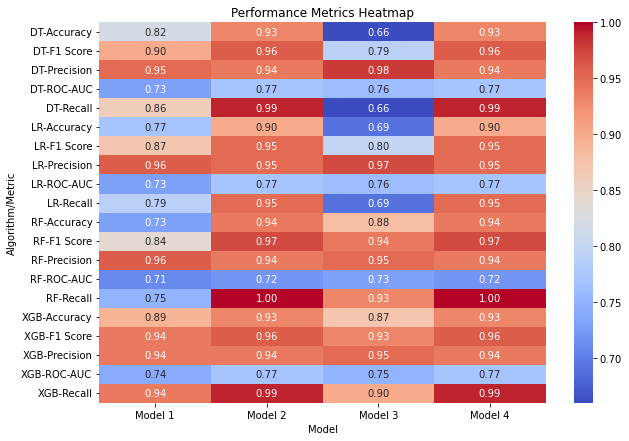

In [88]:
evaluation_metrics_df['Algorithm'] = evaluation_metrics_df['Algorithm'].replace({'LogisticRegression': 'LR',
                                                                                'RandomForest': 'RF',
                                                                                'XGBoost':'XGB'})

pivot_df = evaluation_metrics_df.pivot_table(values='Value', columns='Model', index=['Algorithm', 'Metric'])

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt='.2f')

plt.title("Performance Metrics Heatmap")
plt.ylabel("Algorithm/Metric")  # Explicitly setting the Y-axis label

# Save the figure, making sure to include everything
plt.savefig("Heatmap_Performance_Metrics.png", bbox_inches='tight', dpi=300)

plt.show()


In [ ]:
evaluation_metrics_df.to_csv()

- Decision Trees Model 4
- Random Forest Model 2 or 4
- XGBoost Model 2 or 4
- Logistic Regression Model 2 or 4

# Parallel Coordinate Plot

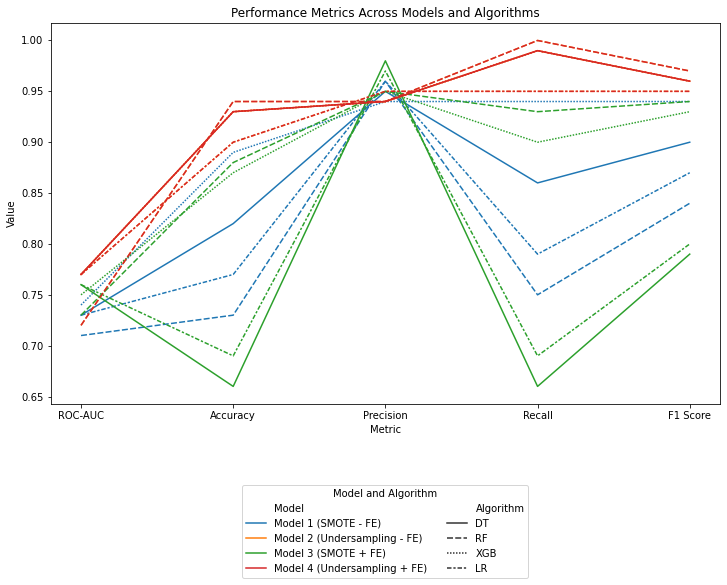

In [101]:
evaluation_metrics_df2 = evaluation_metrics_df.copy()
evaluation_metrics_df2['Model'] = evaluation_metrics_df2['Model'].replace({
    'Model 1': 'Model 1 (SMOTE - FE)',
    'Model 2': 'Model 2 (Undersampling - FE)',
    'Model 3': 'Model 3 (SMOTE + FE)',
    'Model 4': 'Model 4 (Undersampling + FE)'
})

plt.figure(figsize=(12, 7))
sns.lineplot(data=evaluation_metrics_df2, x='Metric', y='Value', hue='Model', style='Algorithm')
plt.title("Performance Metrics Across Models and Algorithms")

# Place legend outside the plot box, at the bottom and center
plt.legend(title='Model and Algorithm', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

# Save plot
plt.savefig("Parallel_coordinate_performance_metrics.png", bbox_inches='tight', dpi=300)

plt.show()



In [64]:

evaluation_metrics_df.to_csv("Evaluation_metrics.csv")